In [9]:
import os, sys
sys.path.append('C:\\Users\\matthias\\Documents\\myProjects\\TU_Bibliothek\\code\\baseline-extract')

import cv2
import matplotlib.pyplot as plt

In [8]:
in_folder = os.path.join('..', 'data', 'cBAD-ICDAR2019', 'test')
out_folder = os.path.join('..', 'data', 'v25_bug_fixed_2')
img_size = 1024

In [9]:
text_list = []

for root, _, files in os.walk(out_folder):
    text_list += [os.path.join(root, f) for f in files]
text_list.sort()
print('found {} files.'.format(len(text_list)))
    
file_list = [os.path.join(in_folder, os.path.basename(f).split('.')[0]+'.jpg') for f in text_list]

found 11 files.


img filename:  ..\data\cBAD-ICDAR2019\test\cPAS-0004.jpg
text filename: ..\data\v25_bug_fixed_2\cPAS-0004.txt


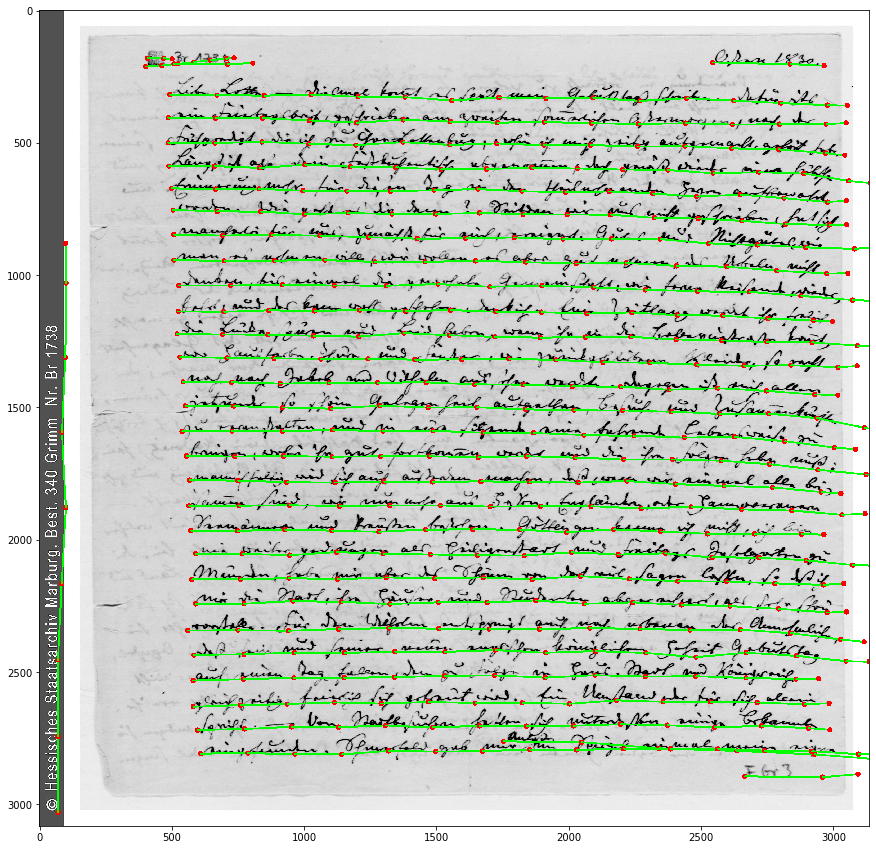

In [11]:
n = 1

print('img filename:  {}'.format(file_list[n]))
print('text filename: {}'.format(text_list[n]))

# Load files
image = cv2.cvtColor(cv2.imread(file_list[n]), cv2.COLOR_BGR2RGB)
#image = cv2.resize(image, (img_size, img_size))

with open(text_list[n], 'r') as f:
    text = [line.rstrip() for line in f]

# Draw labels
radius = 10
thickness = 5

for bl in text:
    points = bl.split(';')
    
    x_old = None
    y_old = None
    
    for p in points:
        x, y = p.split(',')
        x = int(x)
        y = int(y)
        
        if x_old is not None:
            cv2.line(image, (x_old, y_old), (x, y), (0, 255, 0), thickness)
        cv2.circle(image, (x, y), radius, (255, 0, 0), -1)
        
        x_old = x
        y_old = y
        
# Plot
plt.figure(figsize=(15,15))
plt.imshow(image)